In [114]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords       
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer  
from string import punctuation   
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from gensim.models import FastText
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [322]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
# Download necessary NLTK datasets
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Reading Dataset

In [323]:
df = pd.read_csv('D:/DataScience/year 2/Text mining/Medical dataset/Medical Text Dataset.csv',encoding="latin1")

In [324]:
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.6+ KB


In [326]:
df = df.drop('Unnamed: 0',axis=1)
df = df.rename({'0':'label','a':'text'},axis=1)
df.head()

,label,text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [327]:
df.describe()

,label,text
count,7570,7570
unique,3,996
top,Thyroid_Cancer,Thyroid surgery in children in a single insti...
freq,2810,10


In [328]:
cancer_types = df['label'].value_counts()

In [329]:
cancer_types

label
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64

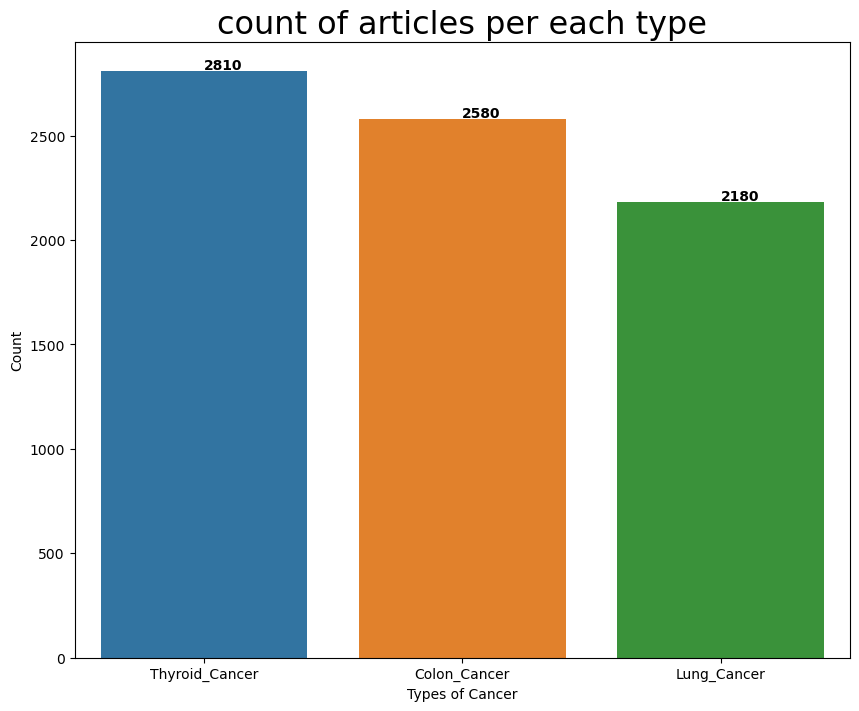

In [330]:
#plotting bar-plot of count.
plt.figure(figsize=(10,8))
plot = sns.barplot(x=cancer_types.index,y=cancer_types.values)
plt.xlabel("Types of Cancer")
plt.ylabel("Count")
plt.title("count of articles per each type",
          fontsize='23')
for i,j in enumerate(cancer_types.values):
    plot.text(i,j+10,str(j),fontweight='bold')
plt.show()

In [331]:
# defining the function for removing stopwords
stopword = stopwords.words("english") # gives a list of stopwords

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def clean_and_preprocess(text):
    # Lowercasing
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization using NLTK
    tokens = word_tokenize(text)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Define custom list of additional stop words
    additional_stop_words = [
        'patient', 'study', 'result', 'found', 'using', 'cancer', 'lung',
        'cell', 'treatment', 'gene', 'including', 'tumor', 'et', 'al', 'c', 'p', 'reported',
        'h', 'n', 'b', 'ha', 'based', 'case'
        # Add other domain-specific stop words here
    ]

    # Combine default English stop words with additional ones
    stop_words = set(stopwords.words('english')) | set(additional_stop_words)

    # Filter out stop words
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back to string
    return ' '.join(tokens)

# Example usage
cleaned_text = clean_and_preprocess("Your sample text here")


In [333]:
# Apply the cleaning function to your text data
df['cleaned_text'] = df['text'].apply(clean_and_preprocess)


In [334]:
# Display the first few rows of the cleaned dataframe
(df.head())

,label,text,cleaned_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,thyroid surgery child single institution osama...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",adopted strategy wa used prior year four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,aimed investigate serum matrix metalloproteina...


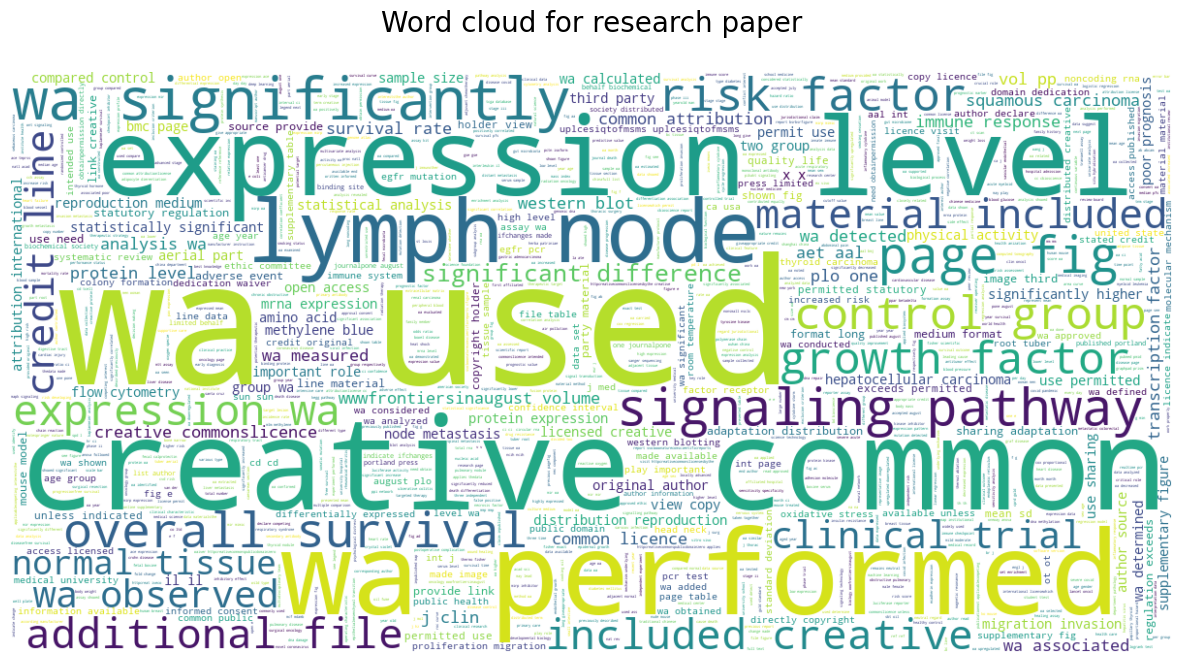

In [335]:
# creating a wordcloud
data = df['cleaned_text']
data_string = ' '.join(data)
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 1000, width=1200, height=600,background_color="white").generate(data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for research paper\n',fontsize = 20)
plt.show()

In [336]:
# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit number of features to the top 10000 terms

# Fit and transform the cleaned text data to get your feature matrix X
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Your target variable y should be the labels you want to predict
y_tfidf = df['label']  # This should be your target column, not transformed by TF-IDF

# Now you have your feature set X_tfidf and your target variable y
print(X_tfidf.shape)


(7570, 10000)


In [337]:
print(y_tfidf.shape)  


(7570,)


In [338]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove whitespaces
    text = text.strip()
    return text

df['cleaned_2vec'] = df['text'].apply(clean_text)


In [339]:
df['tokenized'] = df['cleaned_2vec'].apply(word_tokenize)


In [340]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['tokenized'] = df['tokenized'].apply(remove_stopwords)


In [341]:
sentences = df['tokenized'].tolist()

In [342]:
# Type of the variable
print("Type of sentences:", type(sentences))

# Number of sentences
print("Number of sentences:", len(sentences))

# Sample sentences
#print("Sample sentences:", sentences[:3])  # Adjust the number as needed

# Length of sample sentences
for i, sentence in enumerate(sentences[:5]):  # Adjust the range as needed
    print(f"Length of sentence {i}: {len(sentence)}")

# Type of elements in sentences
if sentences:
    print("Type of first element in sentences:", type(sentences[0]))
    if sentences[0]:
        print("Type of first word in the first sentence:", type(sentences[0][0]))

# Presence of empty sentences
empty_sentences = [s for s in sentences if len(s) == 0]
print(f"Number of empty sentences: {len(empty_sentences)}")


Type of sentences: <class 'list'>
Number of sentences: 7570
Length of sentence 0: 2028
Length of sentence 1: 1651
Length of sentence 2: 2135
Length of sentence 3: 1309
Length of sentence 4: 2124
Type of first element in sentences: <class 'list'>
Type of first word in the first sentence: <class 'str'>
Number of empty sentences: 0


In [343]:
from gensim.models import Word2Vec

# Now use all_sentences for Word2Vec training
Word2Vec_model = Word2Vec(sentence, vector_size=10000, min_count=1, workers=4)
Word2Vec_model.save("word2vec.model")

In [344]:
df.shape

(7570, 5)

In [345]:
# Assuming your DataFrame is named 'df'
df.drop(columns=['text', 'cleaned_2vec', 'tokenized'], inplace=True)

In [346]:
df.head()

,label,cleaned_text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...


In [57]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in word2vec_model.wv.key_to_index]
    if not doc:
        return np.zeros(word2vec_model.vector_size)
    return

In [347]:
# Function to create an average word vector for a document
n np.mean(word2vec_model.wv[doc], axis=0)

X_embeddings = np.array([document_vector(Word2Vec_model, text) for text in df['cleaned_text']])
y_embeddings =  df['label']

In [348]:

print(X_embeddings.shape)  

(7570, 10000)


In [349]:
print(y_embeddings.shape)  

(7570,)


In [350]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels to encode them
y = label_encoder.fit_transform(df['label'])


In [351]:
# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

# Initialize the classifier
rf_classifier_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_tfidf = rf_classifier_tfidf.predict(X_test_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred_tfidf))
print("Accuracy Score for TF-IDF Features:", accuracy_score(y_test, y_pred_tfidf))

                precision    recall  f1-score   support

  Colon_Cancer       1.00      1.00      1.00       517
   Lung_Cancer       1.00      1.00      1.00       407
Thyroid_Cancer       1.00      1.00      1.00       590

      accuracy                           1.00      1514
     macro avg       1.00      1.00      1.00      1514
  weighted avg       1.00      1.00      1.00      1514

Accuracy Score for TF-IDF Features: 1.0


In [352]:
# Split the dataset into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_tfidf = LogisticRegression()

# Train the model
lr_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report for TF-IDF Features:\n", classification_report(y_test, y_pred_tfidf))
print("Accuracy Score for TF-IDF Features:", accuracy_score(y_test, y_pred_tfidf))

Classification Report for TF-IDF Features:
                 precision    recall  f1-score   support

  Colon_Cancer       0.90      0.91      0.90       517
   Lung_Cancer       1.00      1.00      1.00       407
Thyroid_Cancer       0.92      0.91      0.91       590

      accuracy                           0.93      1514
     macro avg       0.94      0.94      0.94      1514
  weighted avg       0.93      0.93      0.93      1514

Accuracy Score for TF-IDF Features: 0.9339498018494056


In [353]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Assuming X_train_tfidf, X_test_tfidf, y_train, and y_test are already defined

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

n_estimators_range = [10, 15, 25, 50, 75, 90, 100]
accuracies = []

for n_estimators in n_estimators_range:
    # Initialize the XGBoost classifier with current n_estimators
    xgb_classifier_tfidf = XGBClassifier(n_estimators=n_estimators, learning_rate=0.05, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    
    # Train the classifier with encoded labels
    xgb_classifier_tfidf.fit(X_train_tfidf, y_train_encoded)
    
    # Predict on the test set and decode the predictions
    y_pred_tfidf_encoded = xgb_classifier_tfidf.predict(X_test_tfidf)
    y_pred_tfidf = label_encoder.inverse_transform(y_pred_tfidf_encoded)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred_tfidf)
    accuracies.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy}")


n_estimators: 10, Accuracy: 0.9848084544253632
n_estimators: 15, Accuracy: 0.9894319682959049
n_estimators: 25, Accuracy: 0.9960369881109643
n_estimators: 50, Accuracy: 1.0
n_estimators: 75, Accuracy: 1.0
n_estimators: 90, Accuracy: 1.0
n_estimators: 100, Accuracy: 1.0


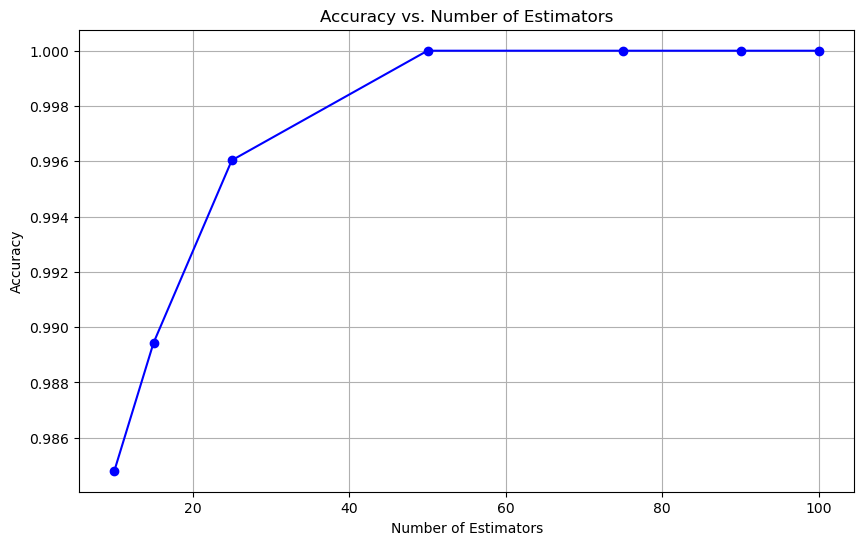

In [354]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [355]:
# Split the dataset into training and testing sets
X_train_embeddings, X_test_embeddings, y_train, y_test = train_test_split(X_embeddings, y_embeddings, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_embeddings = LogisticRegression()

# Train the model
lr_embeddings.fit(X_train_embeddings, y_train)

# Predict on the test set
y_pred_embeddings = lr_embeddings.predict(X_test_embeddings)

# Evaluate the model
print("Classification Report for Word Embeddings Features:\n", classification_report(y_test, y_pred_embeddings))
print("Accuracy Score for Word Embeddings Features:", accuracy_score(y_test, y_pred_embeddings))


Classification Report for Word Embeddings Features:
                 precision    recall  f1-score   support

  Colon_Cancer       0.00      0.00      0.00       517
   Lung_Cancer       0.62      0.10      0.17       407
Thyroid_Cancer       0.40      0.97      0.56       590

      accuracy                           0.41      1514
     macro avg       0.34      0.36      0.25      1514
  weighted avg       0.32      0.41      0.27      1514

Accuracy Score for Word Embeddings Features: 0.4062087186261559


C:\Users\hamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [356]:
# Split the dataset into training and testing sets
X_train_embeddings, X_test_embeddings, y_train, y_test = train_test_split(X_embeddings, y_embeddings, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr_embeddings = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
lr_embeddings.fit(X_train_embeddings, y_train)

# Predict on the test set
y_pred_embeddings = lr_embeddings.predict(X_test_embeddings)

# Evaluate the model
print("Classification Report for Word Embeddings Features:\n", classification_report(y_test, y_pred_embeddings))
print("Accuracy Score for Word Embeddings Features:", accuracy_score(y_test, y_pred_embeddings))


Classification Report for Word Embeddings Features:
                 precision    recall  f1-score   support

  Colon_Cancer       0.89      0.90      0.90       517
   Lung_Cancer       0.89      0.98      0.93       407
Thyroid_Cancer       0.95      0.88      0.91       590

      accuracy                           0.91      1514
     macro avg       0.91      0.92      0.92      1514
  weighted avg       0.92      0.91      0.91      1514

Accuracy Score for Word Embeddings Features: 0.9141347424042272


In [357]:

# Split the dataset into training and testing sets
X_train_embeddings, X_test_embeddings, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

n_estimators_range = [10, 15, 25, 50, 75, 90, 100]  # Define a range of values for n_estimators
accuracies_embeddings = []

for n_estimators in n_estimators_range:
    # Initialize the XGBoost classifier with the current n_estimators
    xgb_embeddings = XGBClassifier(n_estimators=n_estimators, learning_rate=0.05, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    
    # Train the classifier
    xgb_embeddings.fit(X_train_embeddings, y_train)
    
    # Predict on the test set
    y_pred_embeddings = xgb_embeddings.predict(X_test_embeddings)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred_embeddings)
    accuracies_embeddings.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy}")



n_estimators: 10, Accuracy: 0.8249669749009247
n_estimators: 15, Accuracy: 0.8408190224570674
n_estimators: 25, Accuracy: 0.869220607661823
n_estimators: 50, Accuracy: 0.8936591809775429
n_estimators: 75, Accuracy: 0.9154557463672391
n_estimators: 90, Accuracy: 0.9194187582562747
n_estimators: 100, Accuracy: 0.9187582562747688


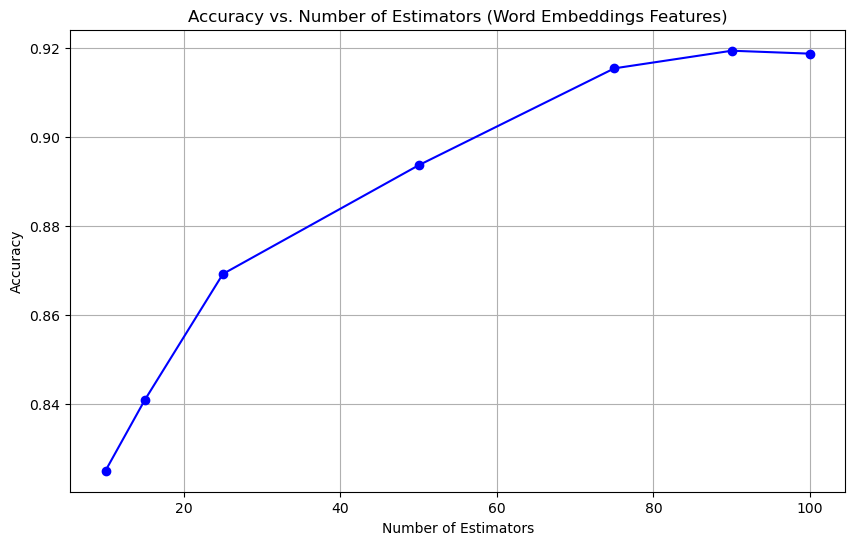

In [358]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies_embeddings, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Estimators (Word Embeddings Features)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [360]:
# Assuming you have preprocessed your text data into a list of tokenized sentences
sentences = [text.split() for text in df['cleaned_text']]

# Train FastText model
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model for later use
fasttext_model.save("fasttext.model")


In [74]:
# Function to create an average word vector for a document using FastText
def document_vector_fasttext(model, doc):
    # Tokenize and remove out-of-vocabulary words
    words = [word for word in doc.split() if word in model.wv.key_to_index]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[words], axis=0)


In [361]:
import numpy as np


# Create feature matrix
X_fasttext = np.array([document_vector_fasttext(fasttext_model, text) for text in df['cleaned_text']])


In [362]:
print(X_fasttext.shape)
print(y.shape)


(7570, 100)
(7570,)


In [363]:
X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

In [364]:
n_estimators_range = [10, 15, 25, 50, 75, 90, 100]  # Define a range of values for n_estimators
accuracies_fastText = []

for n_estimators in n_estimators_range:
    # Initialize the XGBoost classifier with the current n_estimators
    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, use_label_encoder=False, eval_metric='logloss')
    
    # Train the classifier
    xgb_clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = xgb_clf.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_fastText.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy}")


n_estimators: 10, Accuracy: 0.9900924702774109
n_estimators: 15, Accuracy: 1.0
n_estimators: 25, Accuracy: 1.0
n_estimators: 50, Accuracy: 1.0
n_estimators: 75, Accuracy: 1.0
n_estimators: 90, Accuracy: 1.0
n_estimators: 100, Accuracy: 1.0


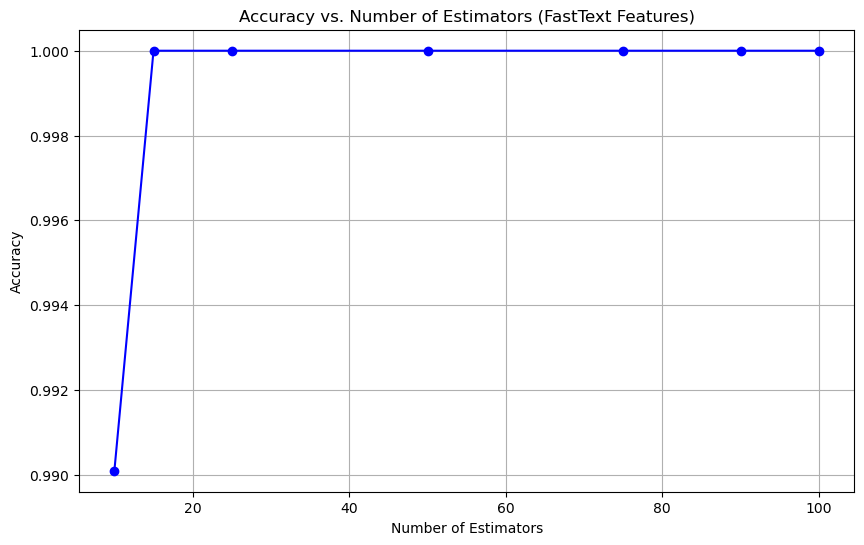

In [365]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies_fastText, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Estimators (FastText Features)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


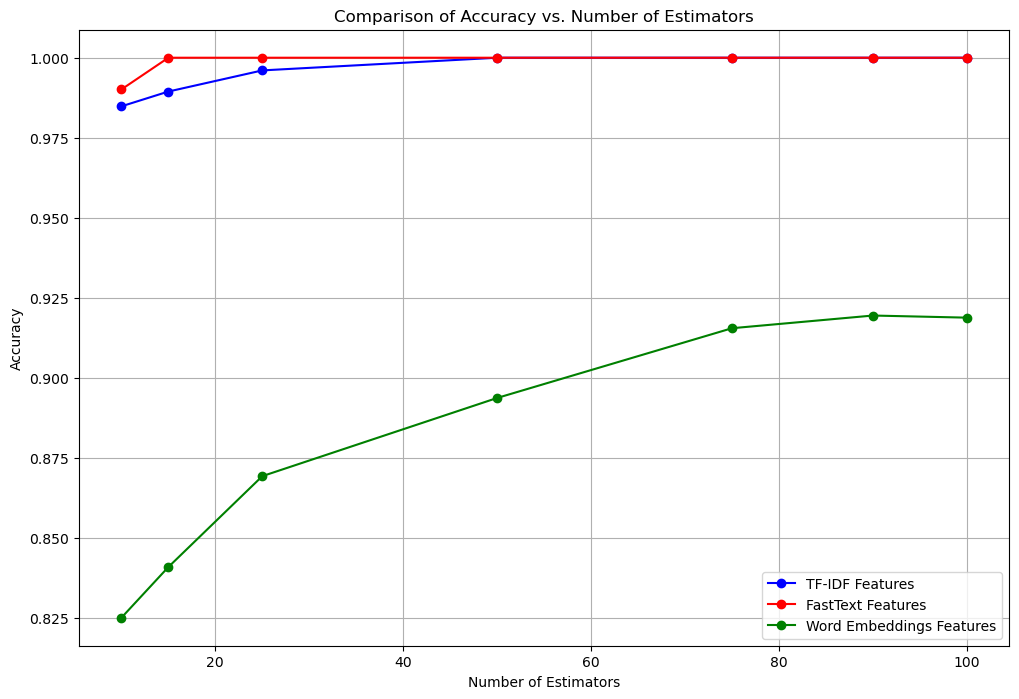

In [366]:
import matplotlib.pyplot as plt

n_estimators_range = [10, 15, 25, 50, 75, 90, 100]  # The range of n_estimators values

# Plotting the results
plt.figure(figsize=(12, 8))

plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b', label='TF-IDF Features')
plt.plot(n_estimators_range, accuracies_fastText, marker='o', linestyle='-', color='r', label='FastText Features')
plt.plot(n_estimators_range, accuracies_embeddings, marker='o', linestyle='-', color='g', label='Word Embeddings Features')

plt.title('Comparison of Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [367]:
df = pd.read_csv('D:/DataScience/year 2/Text mining/Medical dataset/Medical Text Dataset.csv',encoding="latin1")
df = df.drop('Unnamed: 0',axis=1)
df = df.rename({'0':'label','a':'text'},axis=1)
df.head()

def clean_and_preprocess(text):
    # Lowercasing
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Define your custom list of additional stop words
    additional_stop_words = [
        'patient', 'study', 'result', 'found', 'using', 'cancer', 'lung',
        'cell', 'treatment', 'gene', 'including','tumor','et','al','c','p','reported',
        'h','n','b','ha','based','case'
        # Add any other domain-specific stop words here
    ]

    # Combine the default English stop words with your additional ones
    stop_words = set(stopwords.words('english')) | set(additional_stop_words)

    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back to string
    text = ' '.join(tokens)
    return text

# Apply the cleaning function to your text data
df['cleaned_text'] = df['text'].apply(clean_and_preprocess)


# Assuming your DataFrame is named 'df'
df.drop(columns=['text'], inplace=True)

In [368]:
df.head()

,label,cleaned_text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...


In [369]:
train = df
test = df.drop(columns=['label'],axis=0)

In [370]:
# Create X, Y arrays
from sklearn.model_selection import train_test_split

# Training data
X = train["cleaned_text"].values
Y = train["label"].values

# Split into train/validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Test data
x_test = test["cleaned_text"].values

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_val.shape, y_val.shape)
print("Test data:", x_test.shape)

Training data: (6056,) (6056,)
Validation data: (1514,) (1514,)
Test data: (7570,)


In [371]:
import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

Number of replicas: 1


In [372]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on CPU
Number of accelerators:  1


In [373]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)

max_seq_length = 250

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_seq = pad_sequences(x_train_seq, maxlen=max_seq_length)

x_val_seq = tokenizer.texts_to_sequences(x_val)
x_val_seq = pad_sequences(x_val_seq, maxlen=max_seq_length)

x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(x_test_seq, maxlen=max_seq_length)

In [374]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=250))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=6, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate = 1e-4),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc']
                 )

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 250, 128)          2560000   
                                                                 
 conv1d_2 (Conv1D)           (None, 248, 64)           24640     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 124, 64)           0         
 g1D)                                                            
                                                                 
 bidirectional_4 (Bidirecti  (None, 124, 128)          66048     
 onal)                                                           
                                                                 
 batch_normalization_6 (Bat  (None, 124, 128)          512       
 chNormalization)                                                
                                                     

In [375]:
from tensorflow.keras.callbacks import EarlyStopping
# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [376]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

In [377]:
y_train = y_train.astype(float)
y_val = y_val.astype(float)

In [378]:
#training the model on train dataset.
history = model.fit(x_train_seq,
                    y_train,
                    validation_data=(x_val_seq, y_val),
                    callbacks=[earlystopping_cb],
                    batch_size=64,
                    epochs=15,
                    verbose=1,
                   )

Epoch 1/15
95/95 [==============================] - 33s 241ms/step - loss: 1.7527 - acc: 0.3552 - val_loss: 1.9769 - val_acc: 0.3415
Epoch 2/15
95/95 [==============================] - 21s 223ms/step - loss: 0.6533 - acc: 0.8190 - val_loss: 2.0584 - val_acc: 0.3415
Epoch 3/15
95/95 [==============================] - 20s 211ms/step - loss: 0.2712 - acc: 0.9704 - val_loss: 1.9201 - val_acc: 0.3415
Epoch 4/15
95/95 [==============================] - 20s 215ms/step - loss: 0.1563 - acc: 0.9904 - val_loss: 1.5097 - val_acc: 0.4267
Epoch 5/15
95/95 [==============================] - 21s 219ms/step - loss: 0.1066 - acc: 0.9939 - val_loss: 0.8527 - val_acc: 0.6704
Epoch 6/15
95/95 [==============================] - 20s 213ms/step - loss: 0.0775 - acc: 0.9952 - val_loss: 0.2746 - val_acc: 0.9954
Epoch 7/15
95/95 [==============================] - 21s 216ms/step - loss: 0.0648 - acc: 0.9970 - val_loss: 0.0739 - val_acc: 0.9960
Epoch 8/15
95/95 [==============================] - 21s 217ms/step - 

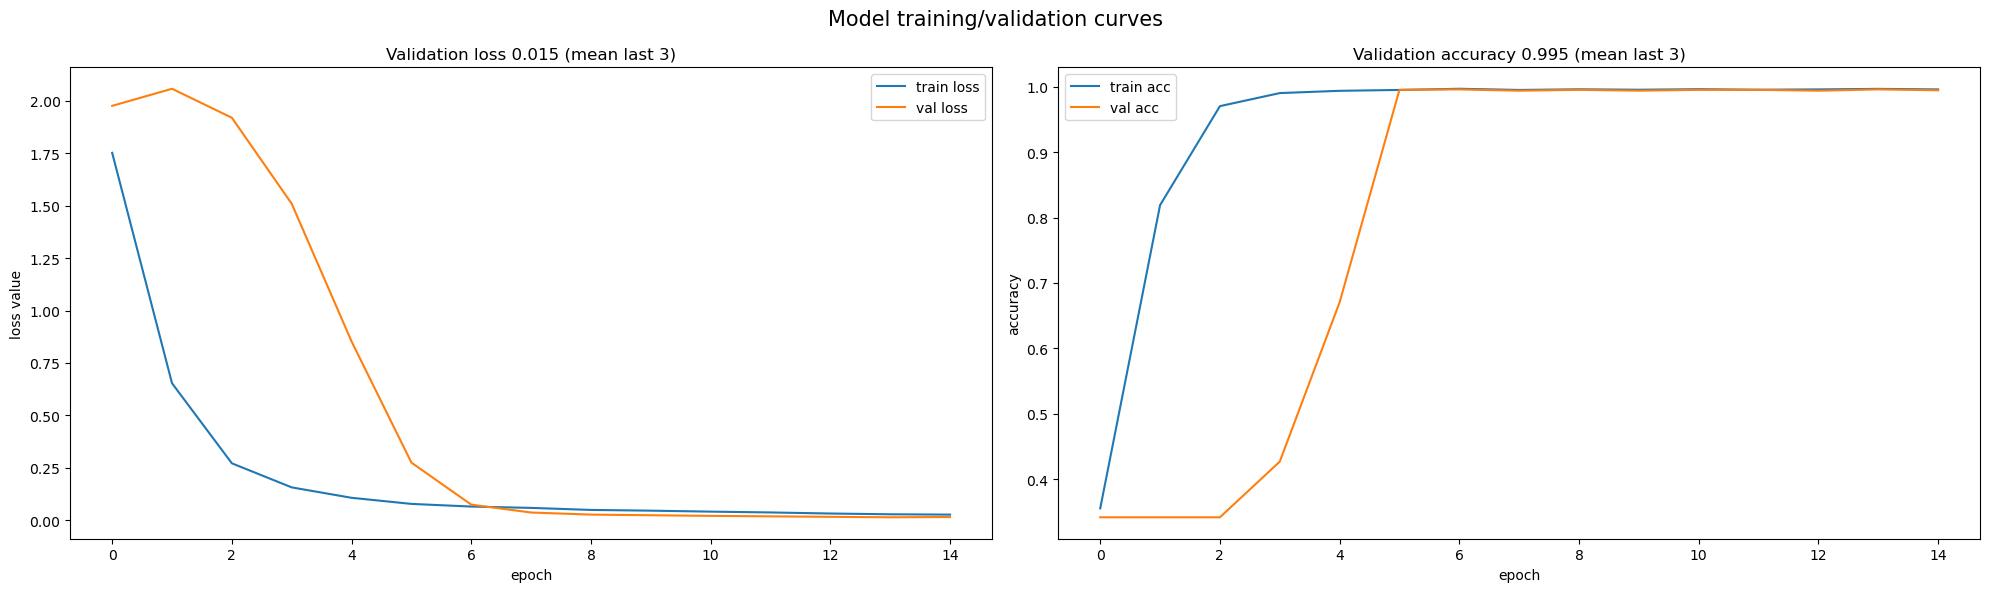

In [379]:
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

In [380]:
test_loss_1, test_acc_1 = model.evaluate(x_val_seq,y_val)

print('Validation loss:', test_loss_1)
print('Validation accuracy:', test_acc_1)

48/48 [==============================] - 2s 40ms/step - loss: 0.0150 - acc: 0.9947
Validation loss: 0.014955246821045876
Validation accuracy: 0.9947159886360168


#######################################################################

# dataset after removing reduntent values 

In [21]:
df = pd.read_csv('D:/DataScience/year 2/Text mining/Medical dataset/old-data/Medical Text Dataset.csv',encoding="latin1")
df.head()


,label,text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis Ã¯Â¬...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   996 non-null    object
 1   text    996 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [23]:
df.describe()

,label,text
count,996,996
unique,3,996
top,Lung_Cancer,Thyroid surgery in children in a single insti...
freq,452,1


In [24]:
cancer_types = df['label'].value_counts()
cancer_types

label
Lung_Cancer       452
Thyroid_Cancer    283
Colon_Cancer      261
Name: count, dtype: int64

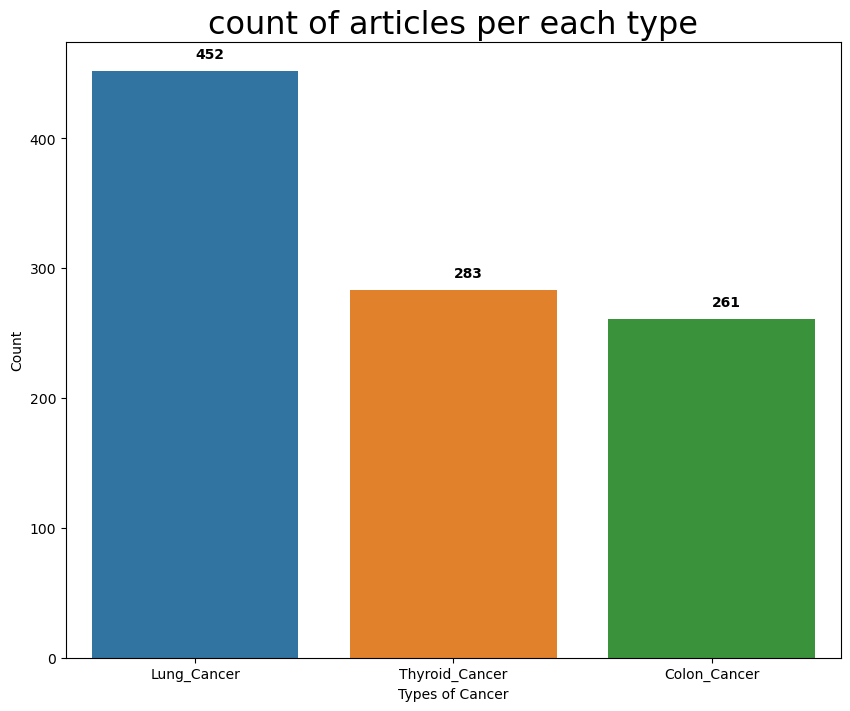

In [25]:
#plotting bar-plot of count.
plt.figure(figsize=(10,8))
plot = sns.barplot(x=cancer_types.index,y=cancer_types.values)
plt.xlabel("Types of Cancer")
plt.ylabel("Count")
plt.title("count of articles per each type",
          fontsize='23')
for i,j in enumerate(cancer_types.values):
    plot.text(i,j+10,str(j),fontweight='bold')
plt.show()

In [26]:
# Apply the cleaning function to your text data
df['cleaned_text'] = df['text'].apply(clean_and_preprocess)
df.head()

,label,text,cleaned_text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...,thyroid surgery child single institution osama...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us...",adopted strategy wa used prior year four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis Ã¯Â¬...,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...,aimed investigate serum matrix metalloproteina...


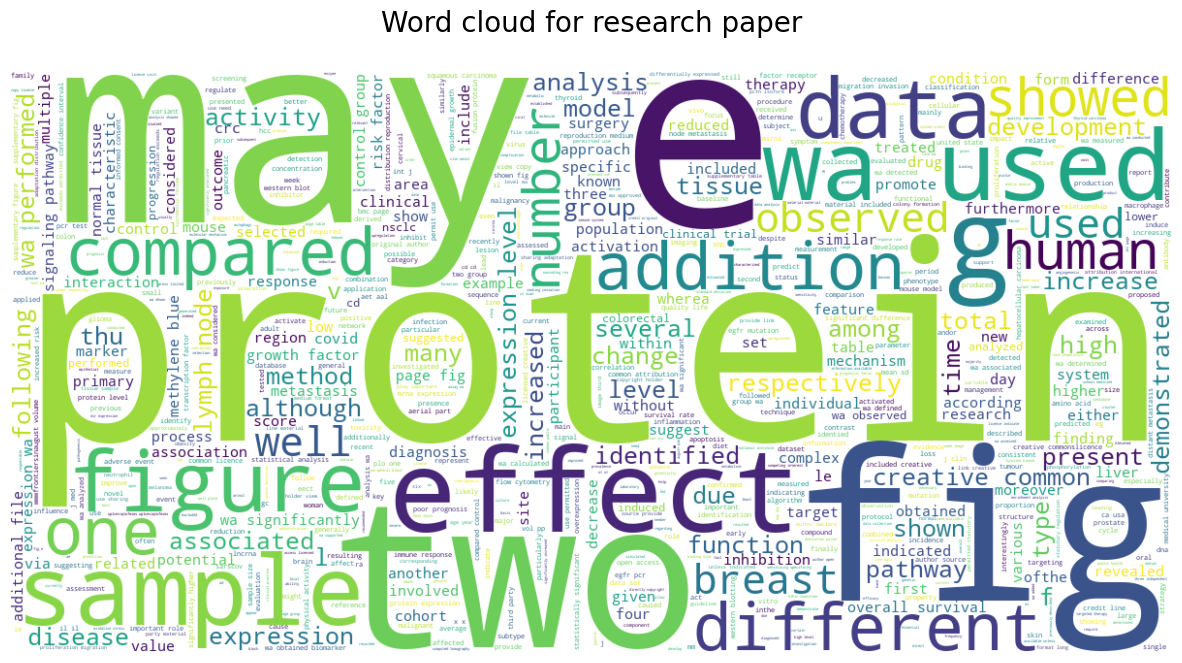

In [27]:
# creating a wordcloud
data = df['cleaned_text']
data_string = ' '.join(data)
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 1000, width=1200, height=600,background_color="white").generate(data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for research paper\n',fontsize = 20)
plt.show()

In [28]:
# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit number of features to the top 10000 terms

# Fit and transform the cleaned text data to get your feature matrix X
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Your target variable y should be the labels you want to predict
y_tfidf = df['label']  # This should be your target column, not transformed by TF-IDF

# Now you have your feature set X_tfidf and your target variable y
print(X_tfidf.shape)

(996, 10000)


In [34]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels to encode them
y = label_encoder.fit_transform(df['label'])


In [35]:
# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)
y_train_encoded = label_encoder.transform(y_train)
# Initialize the classifier
rf_classifier_tfidf = XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_tfidf.fit(X_train_tfidf, y_train_encoded)

# Predict on the test set
y_pred_tfidf = rf_classifier_tfidf.predict(X_test_tfidf)

In [36]:
y_test_encoded =  label_encoder.transform(y_test)
# Print the classification report
print(classification_report(y_test_encoded, y_pred_tfidf))
print("Accuracy Score for TF-IDF Features:", accuracy_score(y_test_encoded, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        55
           1       0.95      1.00      0.97        89
           2       0.85      0.71      0.78        56

    accuracy                           0.88       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.88      0.88      0.88       200

Accuracy Score for TF-IDF Features: 0.88


In [90]:
n_estimators_range = [10, 15, 25, 50, 75, 90, 100,200]

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Assuming X_train_tfidf, X_test_tfidf, y_train, and y_test are already defined

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

accuracies = []

for n_estimators in n_estimators_range:
    # Initialize the XGBoost classifier with current n_estimators
    xgb_classifier_tfidf = XGBClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the classifier with encoded labels
    xgb_classifier_tfidf.fit(X_train_tfidf, y_train_encoded)
    
    # Predict on the test set and decode the predictions
    y_pred_tfidf_encoded = xgb_classifier_tfidf.predict(X_test_tfidf)
    y_pred_tfidf = label_encoder.inverse_transform(y_pred_tfidf_encoded)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred_tfidf)
    accuracies.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy}")


n_estimators: 10, Accuracy: 0.845
n_estimators: 15, Accuracy: 0.855
n_estimators: 25, Accuracy: 0.865
n_estimators: 50, Accuracy: 0.88
n_estimators: 75, Accuracy: 0.875
n_estimators: 90, Accuracy: 0.88
n_estimators: 100, Accuracy: 0.88
n_estimators: 200, Accuracy: 0.875


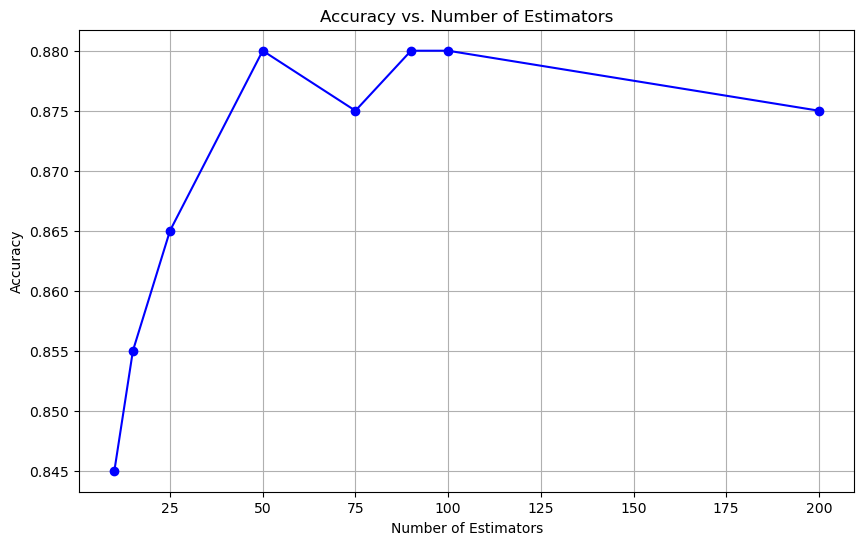

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [64]:
df['tokenized'] = df['cleaned_text'].apply(word_tokenize)
sentences = df['tokenized'].tolist()


In [66]:
df.head()

,label,cleaned_text,tokenized
0,Thyroid_Cancer,thyroid surgery child single institution osama...,"[thyroid, surgery, child, single, institution,..."
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...,"[adopted, strategy, wa, used, prior, year, fou..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,..."
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...,"[solitary, plasmacytoma, sp, skull, uncommon, ..."
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...,"[aimed, investigate, serum, matrix, metallopro..."


In [68]:
# Step 2: Train a Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=1000, window=5, min_count=1, workers=4)

In [69]:
def document_vector(word2vec_model, tokens):
    # remove out-of-vocabulary words
    tokens = [token for token in tokens if token in word2vec_model.wv.index_to_key]
    if len(tokens) == 0:
        return np.zeros(word2vec_model.vector_size)
    else:
        return np.mean(word2vec_model.wv[tokens], axis=0)

df['vector'] = df['tokenized'].apply(lambda tokens: document_vector(word2vec_model, tokens))

In [70]:
df.head()

,label,cleaned_text,tokenized,vector
0,Thyroid_Cancer,thyroid surgery child single institution osama...,"[thyroid, surgery, child, single, institution,...","[0.18653835, 0.11860466, 0.16719154, 0.0418014..."
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...,"[adopted, strategy, wa, used, prior, year, fou...","[0.19071186, 0.075678796, 0.10106883, 0.036400..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,...","[0.2176151, -0.01736149, 0.1280187, 0.03237705..."
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...,"[solitary, plasmacytoma, sp, skull, uncommon, ...","[0.19489196, 0.04625907, 0.09079768, -0.004419..."
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...,"[aimed, investigate, serum, matrix, metallopro...","[0.24331886, -0.0056893057, 0.16134536, 0.0973..."


In [71]:
# Step 4: Prepare the dataset
X = np.stack(df['vector'].values)
y = df['label'].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [103]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
accuracies_embeddings = []


for n_estimators in n_estimators_range:
    # Initialize the XGBoost classifier with the current n_estimators
    xgb_embeddings = XGBClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the classifier
    xgb_embeddings.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = xgb_embeddings.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_embeddings.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy}")

n_estimators: 10, Accuracy: 0.605
n_estimators: 15, Accuracy: 0.585
n_estimators: 25, Accuracy: 0.59
n_estimators: 50, Accuracy: 0.59
n_estimators: 75, Accuracy: 0.6
n_estimators: 90, Accuracy: 0.6
n_estimators: 100, Accuracy: 0.6
n_estimators: 200, Accuracy: 0.605


In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.36      0.38        55
           1       0.81      0.91      0.86        89
           2       0.39      0.36      0.37        56

    accuracy                           0.60       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.58      0.60      0.59       200



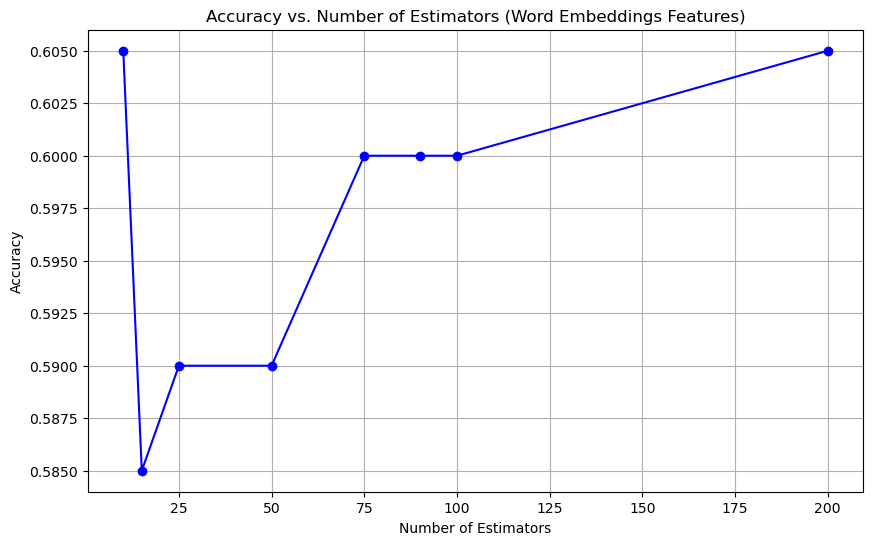

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies_embeddings, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Estimators (Word Embeddings Features)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [76]:
# Train FastText model
fasttext_model = FastText(sentences, vector_size=1000, window=5, min_count=1, workers=4)
# Save the model for later use
fasttext_model.save("fasttext.model")

In [78]:
# Create feature matrix
X_fasttext = np.array([document_vector_fasttext(fasttext_model, text) for text in df['cleaned_text']])

In [79]:
print(X_fasttext.shape)
print(y.shape)


(996, 1000)
(996,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y_encoded, test_size=0.2, random_state=42)

In [101]:
accuracies_fastText = []

for n_estimators in n_estimators_range:
    # Initialize the XGBoost classifier with the current n_estimators
    xgb_clf = XGBClassifier(n_estimators=n_estimators, use_label_encoder=False, eval_metric='logloss')
    
    # Train the classifier
    xgb_clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = xgb_clf.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies_fastText.append(accuracy)
    print(f"n_estimators: {n_estimators}, Accuracy: {accuracy}")


n_estimators: 10, Accuracy: 0.595
n_estimators: 15, Accuracy: 0.605
n_estimators: 25, Accuracy: 0.605
n_estimators: 50, Accuracy: 0.59
n_estimators: 75, Accuracy: 0.595
n_estimators: 90, Accuracy: 0.6
n_estimators: 100, Accuracy: 0.6
n_estimators: 200, Accuracy: 0.575


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.25      0.29        55
           1       0.78      0.89      0.83        89
           2       0.38      0.39      0.39        56

    accuracy                           0.57       200
   macro avg       0.50      0.51      0.50       200
weighted avg       0.55      0.57      0.56       200



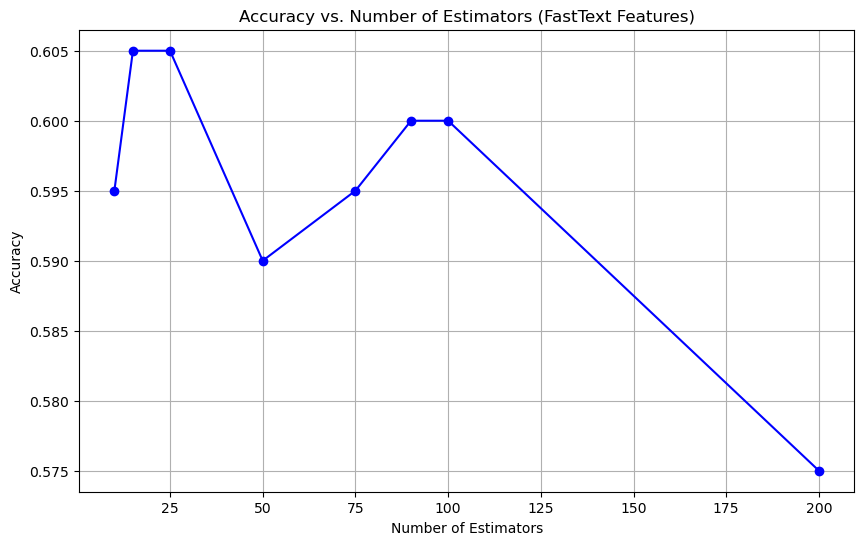

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies_fastText, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Estimators (FastText Features)')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

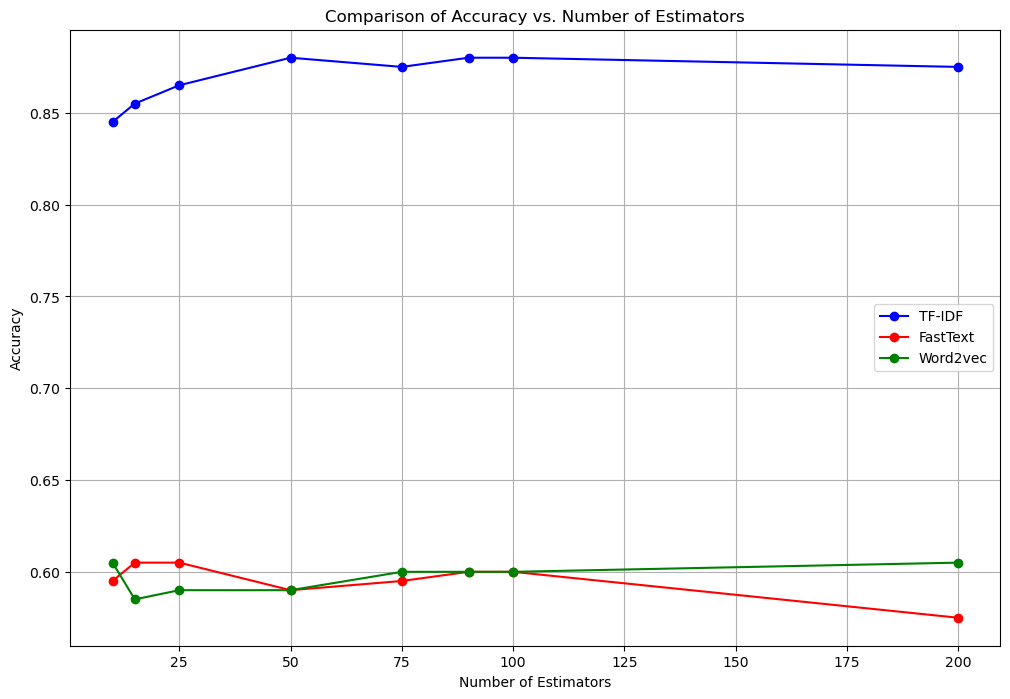

In [93]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(12, 8))

plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b', label='TF-IDF ')
plt.plot(n_estimators_range, accuracies_fastText, marker='o', linestyle='-', color='r', label='FastText')
plt.plot(n_estimators_range, accuracies_embeddings, marker='o', linestyle='-', color='g', label='Word2vec')

plt.title('Comparison of Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Neural Network

In [105]:
df.head()

,label,cleaned_text,tokenized,vector
0,Thyroid_Cancer,thyroid surgery child single institution osama...,"[thyroid, surgery, child, single, institution,...","[0.18653835, 0.11860466, 0.16719154, 0.0418014..."
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...,"[adopted, strategy, wa, used, prior, year, fou...","[0.19071186, 0.075678796, 0.10106883, 0.036400..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...,"[coronary, arterybypass, grafting, thrombosis,...","[0.2176151, -0.01736149, 0.1280187, 0.03237705..."
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...,"[solitary, plasmacytoma, sp, skull, uncommon, ...","[0.19489196, 0.04625907, 0.09079768, -0.004419..."
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...,"[aimed, investigate, serum, matrix, metallopro...","[0.24331886, -0.0056893057, 0.16134536, 0.0973..."


In [106]:
df.drop(columns=['tokenized','vector'], inplace=True)


In [161]:
df.head()

,label,cleaned_text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...


In [178]:
train = df
test = df.drop(columns=['label'],axis=0)

In [179]:
# Training data
X = train["cleaned_text"].values
Y = train["label"].values

# Split into train/validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

# Test data
x_test = test["cleaned_text"].values

print("Training data:", x_train.shape, y_train.shape)
print("Validation data:", x_val.shape, y_val.shape)
print("Test data:", x_test.shape)

Training data: (697,) (697,)
Validation data: (299,) (299,)
Test data: (996,)


In [180]:
# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)

max_seq_length = 1000

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_train_seq = pad_sequences(x_train_seq, maxlen=max_seq_length)

x_val_seq = tokenizer.texts_to_sequences(x_val)
x_val_seq = pad_sequences(x_val_seq, maxlen=max_seq_length)

x_test_seq = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(x_test_seq, maxlen=max_seq_length)

In [181]:
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Adjust model architecture
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=max_seq_length))
model.add(Dropout(0.2))  # Adjusted dropout rate

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Reduced complexity
model.add(MaxPooling1D(pool_size=2))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(GlobalMaxPooling1D())  # To reduce overfitting

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))  # Increased dropout rate

model.add(Dense(units=6, activation='softmax'))

# Implement learning rate scheduling
initial_learning_rate = 1e-4
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Compile model with gradient clipping
model.compile(optimizer=Adam(learning_rate=lr_schedule, clipvalue=1.0),  # Added gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1000, 128)         2560000   
                                                                 
 dropout_16 (Dropout)        (None, 1000, 128)         0         
                                                                 
 conv1d_8 (Conv1D)           (None, 998, 32)           12320     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 499, 32)           0         
 g1D)                                                            
                                                                 
 bidirectional_9 (Bidirecti  (None, 499, 128)          49664     
 onal)                                                           
                                                                 
 global_max_pooling1d_6 (Gl  (None, 128)              

In [182]:
from tensorflow.keras.callbacks import EarlyStopping
# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_train = y_train.astype(float)
y_val = y_val.astype(float)

In [183]:
# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)

# Early stopping callback
early_stopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

# Convert labels to categorical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)


In [184]:
# Train the model
history = model.fit(
    x_train_seq,
    y_train_encoded,
    validation_data=(x_val_seq, y_val_encoded),
    callbacks=[reduce_lr],  # Added reduce_lr callback
    batch_size=64,
    epochs=50,
    verbose=1
)

Epoch 1/50
11/11 [==============================] - 10s 485ms/step - loss: 1.7922 - accuracy: 0.0832 - val_loss: 1.7847 - val_accuracy: 0.1605 - lr: 1.0000e-04
Epoch 2/50
11/11 [==============================] - 4s 382ms/step - loss: 1.7773 - accuracy: 0.1951 - val_loss: 1.7721 - val_accuracy: 0.4415 - lr: 1.0000e-04
Epoch 3/50
11/11 [==============================] - 4s 378ms/step - loss: 1.7639 - accuracy: 0.3400 - val_loss: 1.7609 - val_accuracy: 0.5050 - lr: 1.0000e-04
Epoch 4/50
11/11 [==============================] - 4s 374ms/step - loss: 1.7525 - accuracy: 0.3917 - val_loss: 1.7474 - val_accuracy: 0.4816 - lr: 1.0000e-04
Epoch 5/50
11/11 [==============================] - 4s 375ms/step - loss: 1.7332 - accuracy: 0.4362 - val_loss: 1.7311 - val_accuracy: 0.4749 - lr: 1.0000e-04
Epoch 6/50
11/11 [==============================] - 4s 376ms/step - loss: 1.7144 - accuracy: 0.4548 - val_loss: 1.7099 - val_accuracy: 0.4381 - lr: 1.0000e-04
Epoch 7/50
11/11 [===========================

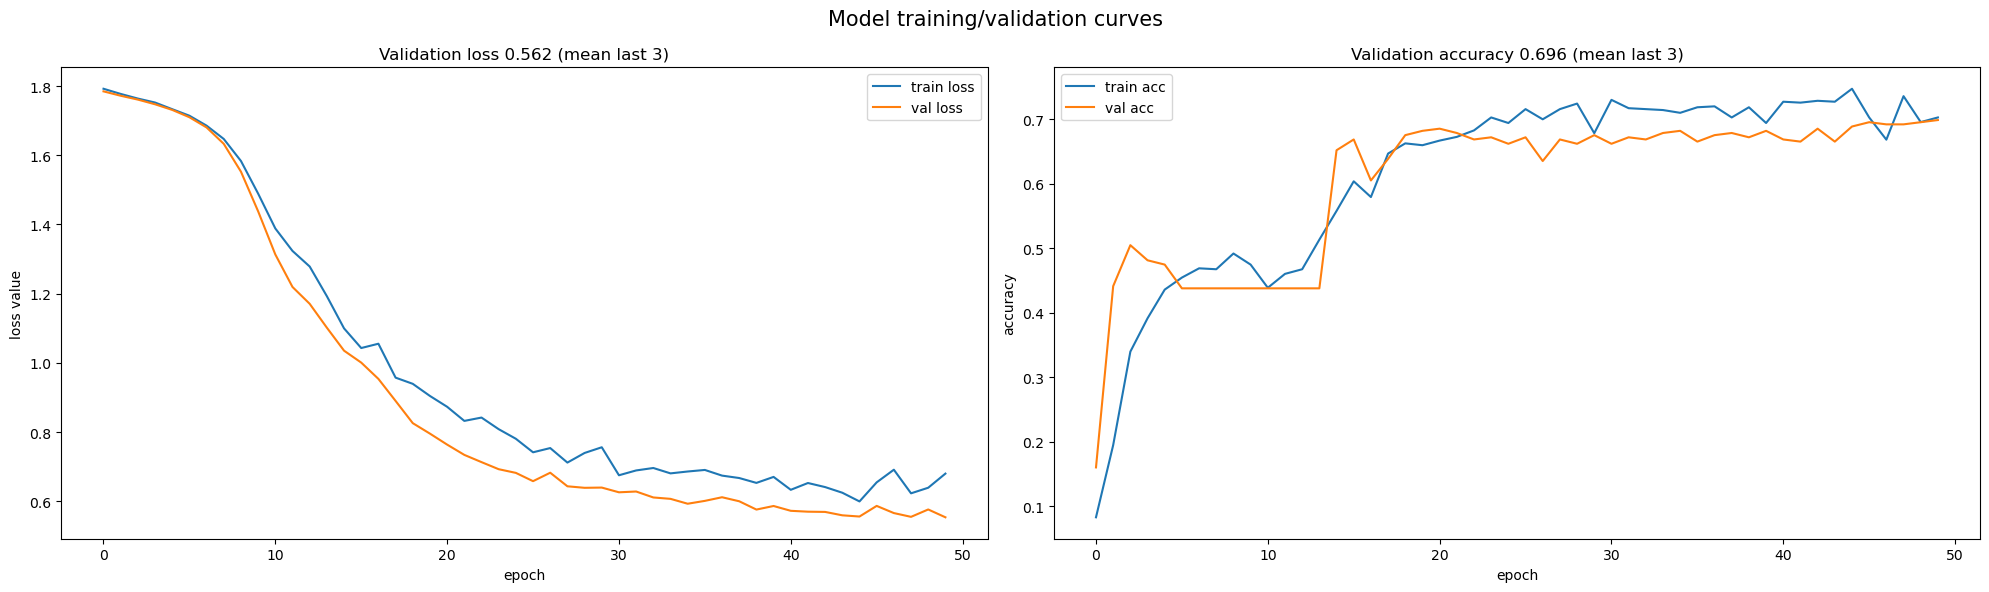

In [185]:

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["accuracy"], label="train acc")
ax2.plot(history.history["val_accuracy"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_accuracy"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

### Knwoledge representation

In [186]:
# 1. Text Analysis and Preprocessing
df.head()

,label,cleaned_text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...


In [384]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_sm-0.5.3.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.3/en_core_sci_sm-0.5.3.tar.gz (14.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [187]:
import spacy
nlp = spacy.load("en_core_sci_sm")
doc = nlp("Alterations in the hypocretin receptor 2 and preprohypocretin genes produce narcolepsy in some animals.")

C:\Users\hamed\anaconda3\Lib\site-packages\spacy\language.py:2141: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [188]:
import spacy
# Load a pre-trained spaCy model
nlp = spacy.load("en_core_sci_sm")
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

In [190]:
df.head()

,label,cleaned_text
0,Thyroid_Cancer,thyroid surgery child single institution osama...
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...


In [191]:
# Apply the function to each row in the 'cleaned_text' column
df['entities'] = df['cleaned_text'].apply(extract_entities)

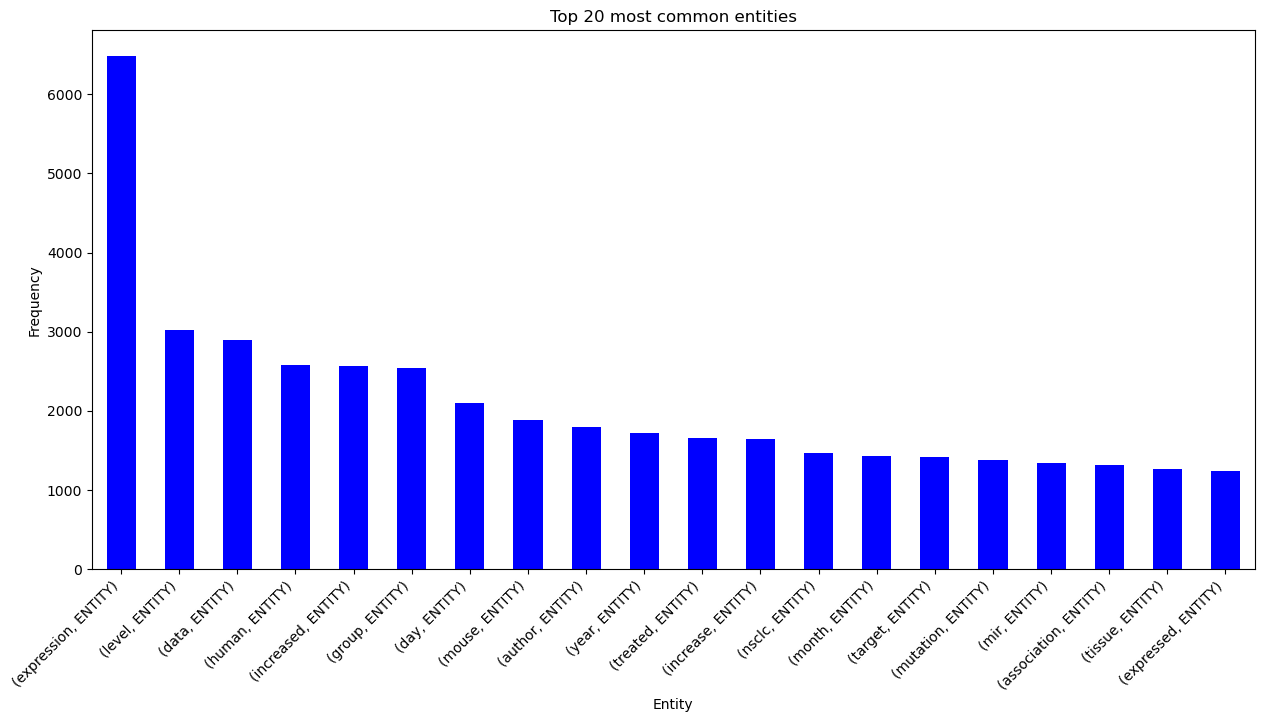

In [192]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a column 'entities' with the extracted entities
all_entities = [entity for sublist in df['entities'] for entity in sublist]

# Count the frequency of each entity
entity_freq = Counter(all_entities)

# Convert the counter object into a DataFrame for easy manipulation and sorting
entity_freq_df = pd.DataFrame(entity_freq.items(), columns=['Entity', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Now, plot the top N most common entities
top_n = 20
entity_freq_df.head(top_n).plot(kind='bar', x='Entity', y='Frequency', color='blue', figsize=(15, 7), legend=False)
plt.title(f'Top {top_n} most common entities')
plt.ylabel('Frequency')
plt.xlabel('Entity')
plt.xticks(rotation=45, ha='right')
plt.show()


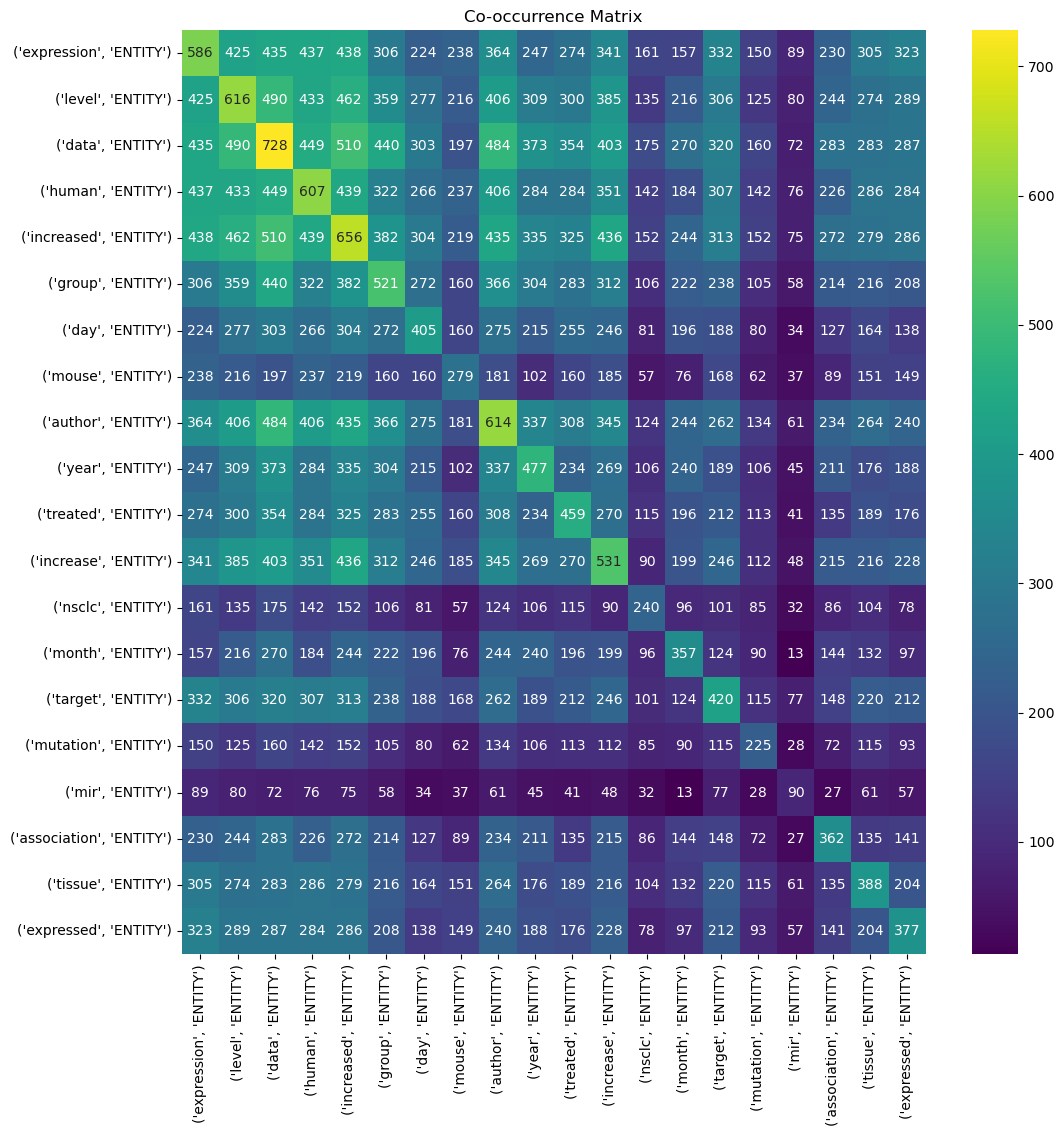

In [193]:
import numpy as np

# Select the top N entities for the correlation analysis
top_entities = [item[0] for item in entity_freq.most_common(top_n)]

# Initialize a square matrix with zeros
co_occurrence_matrix = np.zeros((top_n, top_n))

# Fill the matrix with co-occurrence counts
for entities in df['entities']:
    for i, entity1 in enumerate(top_entities):
        for j, entity2 in enumerate(top_entities):
            if entity1 in entities and entity2 in entities:
                co_occurrence_matrix[i, j] += 1

# Convert the matrix into a DataFrame for better readability
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=top_entities, columns=top_entities)

# Plotting the co-occurrence matrix
plt.figure(figsize=(12, 12))
sns.heatmap(co_occurrence_df, annot=True, fmt='g', cmap='viridis')
plt.title('Co-occurrence Matrix')
plt.show()

In [194]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_sci_sm")

def extract_relationships(doc):
    # Parse the document using spaCy
    parsed_doc = nlp(doc)
    
    # Initialize an empty list to store relationships
    relationships = []
    
    # Iterate over the tokens
    for token in parsed_doc:
        # Check if the token is a verb, which often indicates a relationship
        if token.pos_ == "VERB":
            # Find the subject and object connected to the verb
            subject = [w for w in token.lefts if w.dep_ in ("nsubj", "nsubjpass")]
            object = [w for w in token.rights if w.dep_ in ("dobj", "attr", "prep", "agent")]
            if subject and object:
                # Since there can be more than one subject or object, iterate through all combinations
                for subj in subject:
                    for obj in object:
                        relationships.append((subj, token, obj))
    return relationships


In [195]:
# Apply the function to the 'cleaned_text' to extract relationships
df['relationships'] = df['cleaned_text'].apply(extract_relationships)

In [196]:
df.head()

,label,cleaned_text,entities,relationships
0,Thyroid_Cancer,thyroid surgery child single institution osama...,"[(thyroid surgery, ENTITY), (institution, ENTI...","[(aseerib, ahmed, alhumaida), (osama, ali, sau..."
1,Thyroid_Cancer,adopted strategy wa used prior year four exclu...,"[(year, ENTITY), (return four disjoint citatio...","[(term, made, set), (query, qwosfiltered, sear..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis brin...,"[(coronary arterybypass grafting, ENTITY), (th...","[(report, admitted, bypass), (report, admitted..."
3,Thyroid_Cancer,solitary plasmacytoma sp skull uncommon clinic...,"[(solitary plasmacytoma, ENTITY), (clinical en...","[(report, describes, mass), (report, describes..."
4,Thyroid_Cancer,aimed investigate serum matrix metalloproteina...,"[(investigate, ENTITY), (serum matrix metallop...","[(metalloproteinase, mmplevels, compared), (mm..."


In [197]:
import networkx as nx
import matplotlib.pyplot as plt
from ast import literal_eval

In [198]:
# Now, let's select the first 10 records for each unique label
grouped_data = df.groupby('label').head(3)

In [199]:
def build_and_draw_graph(grouped_data):
    G = nx.DiGraph()

    # Determine the color for each label
    label_color = {
        'Thyroid_Cancer': 'blue',
        'Colon_Cancer': 'green',
        'Lung_Cancer': 'red'
    }

    # Add nodes with attributes
    for index, row in grouped_data.iterrows():
        for entity in row['entities']:
            G.add_node(entity[0], type=entity[1], label=row['label'])  # Use label directly from the row

    # Add edges with attributes
    for index, row in grouped_data.iterrows():
        for relationship in row['relationships']:
            if relationship[0] in G and relationship[2] in G:
                G.add_edge(relationship[0], relationship[2], type=relationship[1])

    # Prepare the figure
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G)

    # Plot nodes by group and create legend handles
    legend_handles = []
    for label, color in label_color.items():
        nodes_of_label = [node for node, data in G.nodes(data=True) if data.get('label') == label]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_label, node_size=500, node_color=color, label=label)
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color))

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5, edge_color='grey')

    # Optionally, draw edge and node labels here

    # Create legend from handles
    plt.legend(handles=legend_handles, loc='upper left')

    plt.title('Knowledge Graph', size=15)
    plt.axis('off')
    plt.show()


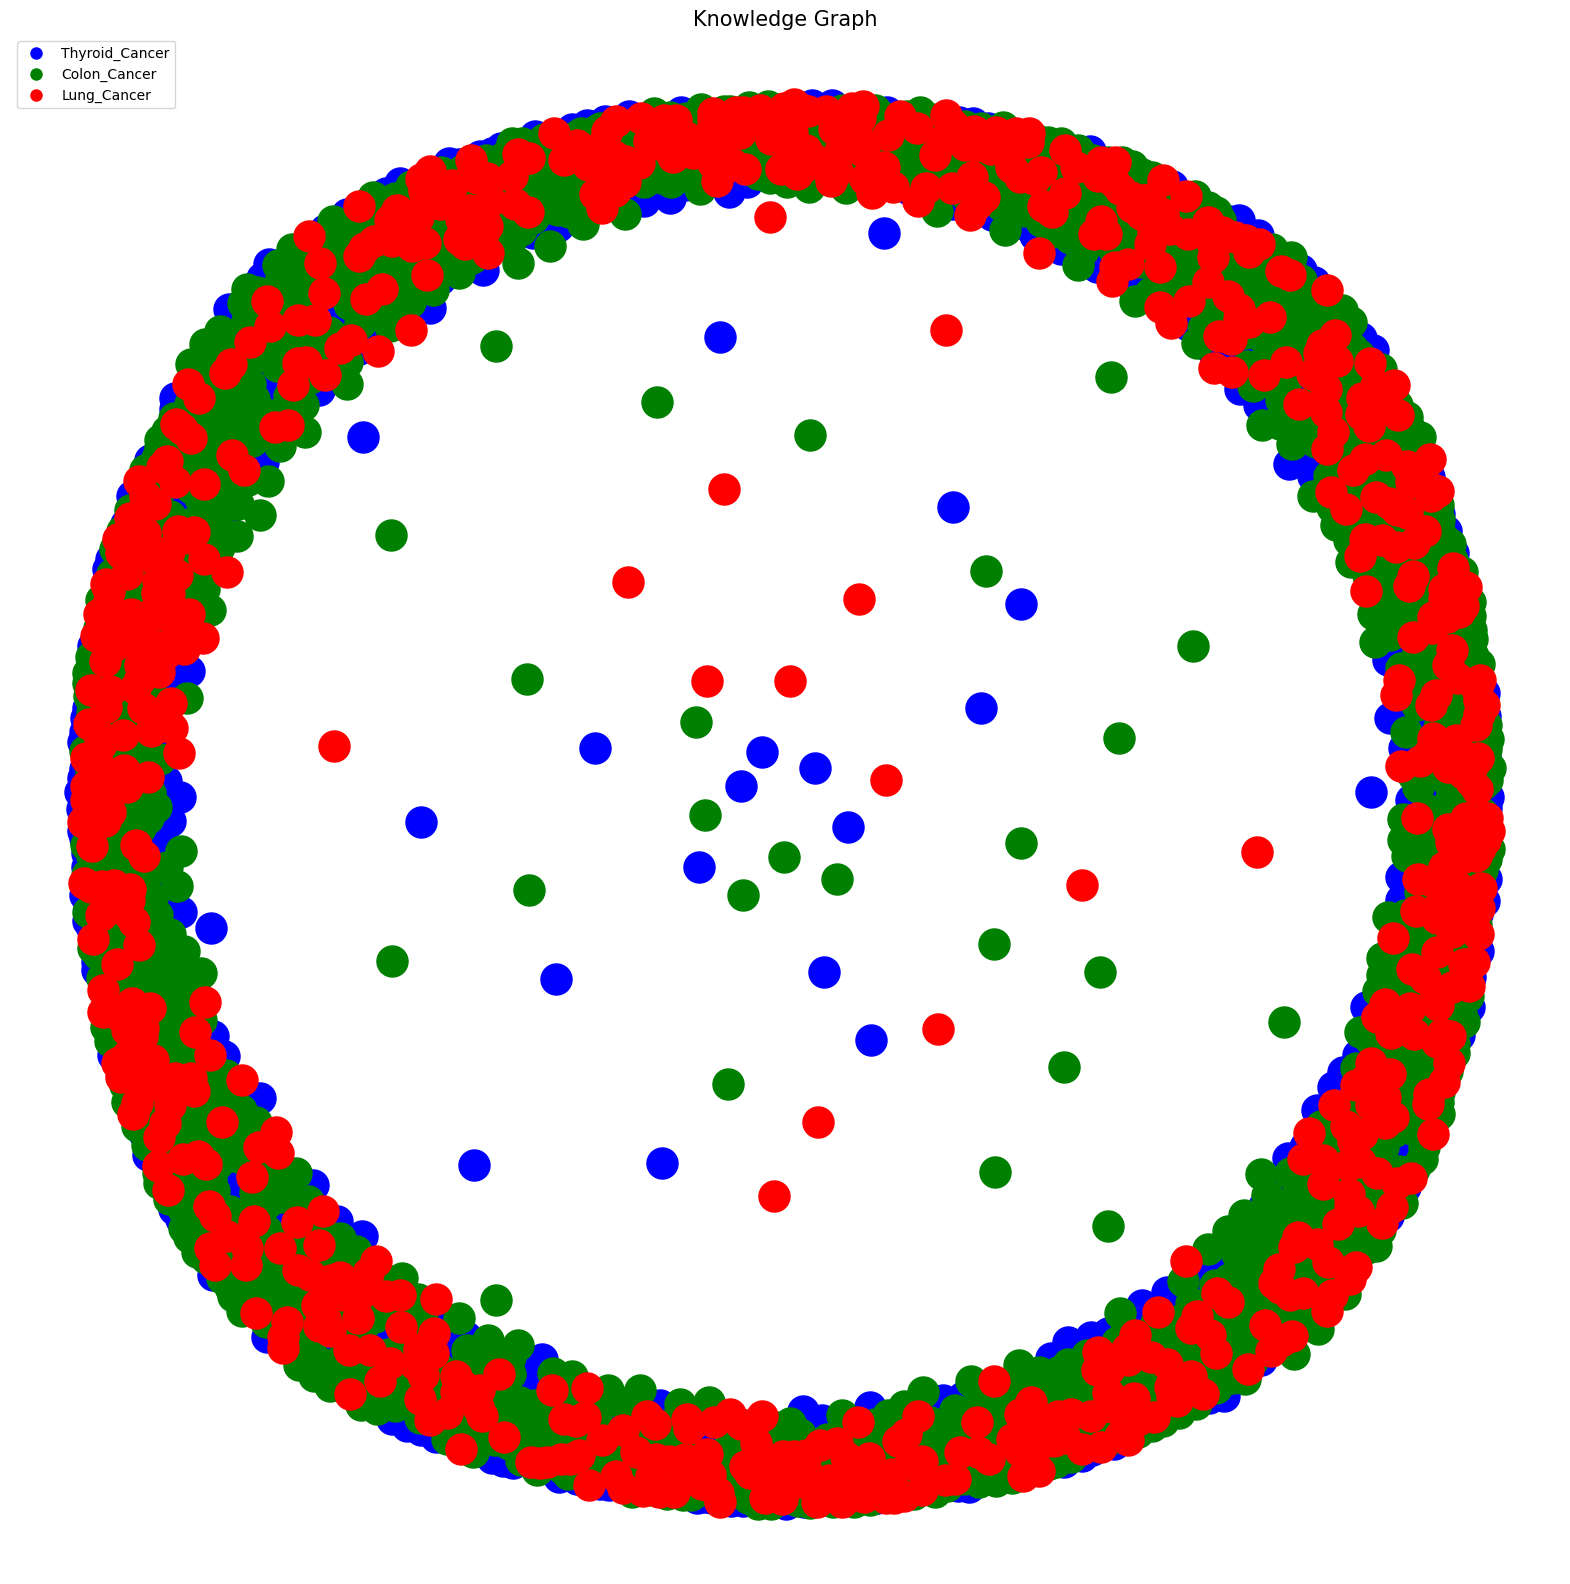

In [200]:
build_and_draw_graph(grouped_data)